In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('prep_train.csv')
data

,id,text,class,lemm_text,len_text_text,count_punct_text,count_numbers_text,count_digits_text,count_uppercase_text,count_lowercase_text,...,POS_CONJ_text,POS_VERB_text,POS_PRED_text,POS_ADJS_text,POS_PRTF_text,POS_PRTS_text,POS_INTJ_text,POS_NUMR_text,POS_GRND_text,POS_COMP_text
0,0,"Обустройство тротуаров, мостовых (в том числе ...",H,обустройство тротуар мостовый в тот число трот...,66,0.045455,0.000000,0.000000,0.015152,0.818182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Въ издержкахъ же оныхъ вы имете присылать счет...,H,въ издержкахъ же оныхъ вы имета присылать счёт...,117,0.025641,0.000000,0.000000,0.008547,0.811966,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"Положи это туда, откуда взял.",H,положить это туда откуда взять,29,0.068966,0.000000,0.000000,0.034483,0.758621,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Минстрой обозначил способы снижения энергоемко...,M,минстрой обозначить способ снижение энергоёмко...,71,0.014085,0.000000,0.000000,0.014085,0.887324,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,В конце 1873 года военный суд вынес решение по...,M,в конец 1873 год военный суд вынести решение п...,76,0.013158,0.013158,0.052632,0.052632,0.723684,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129061,215102,Убытки МУП &quot;Теплоэнерго&nbsp;&ndash;. На ...,M,убыток муп quot теплоэнерго nbsp ndash на терр...,538,0.029740,0.011152,0.013011,0.040892,0.776952,...,3.0,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN
129062,215104,Три сестры были молодёжными послами на Национа...,H,три сестра быть молодёжный посол на национальн...,71,0.014085,0.014085,0.056338,0.056338,0.718310,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
129063,215105,В Прекрасной России Будущего коты создадут сво...,H,в прекрасный россия будущее коты создать свой ...,153,0.026144,0.006536,0.013072,0.026144,0.790850,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129064,215106,В семье наше будущее!,M,в семья наш будущее,21,0.047619,0.000000,0.000000,0.047619,0.761905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['id', 'text', 'class', 'lemm_text', 'len_text_text', 'count_punct_text',
       'count_numbers_text', 'count_digits_text', 'count_uppercase_text',
       'count_lowercase_text', 'avg_word_len_text',
       'mean_ru_vowel_occurance_text', 'mean_ru_consonant_occurance_text',
       'mean_en_vowel_occurance_text', 'mean_en_consonant_occurance_text',
       'count_space_text', 'count_kirr_text', 'count_lat_text', 'POS_text',
       'count_POS_text', 'sent_POS_text', 'POS_NOUN_text', 'POS_ADJF_text',
       'POS_PREP_text', 'POS_None_text', 'POS_PRCL_text', 'POS_NPRO_text',
       'POS_INFN_text', 'POS_ADVB_text', 'POS_CONJ_text', 'POS_VERB_text',
       'POS_PRED_text', 'POS_ADJS_text', 'POS_PRTF_text', 'POS_PRTS_text',
       'POS_INTJ_text', 'POS_NUMR_text', 'POS_GRND_text', 'POS_COMP_text'],
      dtype='object')

In [4]:
data['class'].value_counts()

H    64535
M    64531
Name: class, dtype: int64

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [6]:
train = pd.read_csv('prep_train.csv')
val = pd.read_csv('prep_val.csv')

In [7]:
train['sent_POS_text'].isnull().sum(), val['sent_POS_text'].isnull().sum()

(0, 1)

In [8]:
val.dropna(subset=['sent_POS_text'], inplace=True)
# удаляем строки с NaN, перезаписываем ту же таблицу

In [9]:
# проверка
train['sent_POS_text'].isnull().sum(), val['sent_POS_text'].isnull().sum()

(0, 0)

In [10]:
vectorizer = CountVectorizer(ngram_range=(1,2))
# Convert a collection of text documents to a matrix of token counts.
# The lower and upper boundary of the range of n-values for different word n-grams or char n-grams
# to be extracted.
# All values of n such such that min_n <= n <= max_n will be used. 
# For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams

In [11]:
val['class']

0        H
1        H
2        M
3        H
4        M
        ..
21506    H
21507    M
21508    M
21509    M
21510    M
Name: class, Length: 21510, dtype: object

In [12]:
train['class'] = train['class'].map({'H': 0, 'M': 1})
val['class'] = val['class'].map({'H': 0, 'M': 1})
# Встроенная в Python функция map() используется для применения функции к каждому элементу итерируемого объекта

In [13]:
val['class']

0        0
1        0
2        1
3        0
4        1
        ..
21506    0
21507    1
21508    1
21509    1
21510    1
Name: class, Length: 21510, dtype: int64

In [14]:
x_train = train['sent_POS_text'].values
x_val = val['sent_POS_text'].values

y_train = train['class'].values
y_val = val['class'].values

In [15]:
train['sent_POS_text'].values

array(['NOUN NOUN ADJF PREP ADJF NOUN ADJF NOUN',
       'None NOUN PRCL NOUN NPRO NOUN INFN NOUN ADJF NOUN ADVB None NOUN NOUN CONJ None ADJF ADJF NOUN',
       'VERB PRCL ADVB ADVB VERB', ...,
       'PREP ADJF NOUN NOUN NOUN VERB ADJF NOUN ADVB NOUN NOUN ADVB None NOUN ADVB PREP NOUN VERB INFN PRCL PREP ADJF NOUN',
       'PREP NOUN ADJF NOUN',
       'NOUN VERB PREP NOUN PREP NOUN NOUN PREP NOUN PREP ADJF NOUN NOUN'],
      dtype=object)

In [16]:
x_train_bow = vectorizer.fit_transform(x_train)
x_val_bow = vectorizer.transform(x_val)

In [17]:
vectorizer.get_feature_names()
# http://zabaykin.ru/?p=463

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['adjf',
 'adjf adjf',
 'adjf adjs',
 'adjf advb',
 'adjf comp',
 'adjf conj',
 'adjf grnd',
 'adjf infn',
 'adjf intj',
 'adjf none',
 'adjf noun',
 'adjf npro',
 'adjf numr',
 'adjf prcl',
 'adjf pred',
 'adjf prep',
 'adjf prtf',
 'adjf prts',
 'adjf verb',
 'adjs',
 'adjs adjf',
 'adjs adjs',
 'adjs advb',
 'adjs comp',
 'adjs conj',
 'adjs grnd',
 'adjs infn',
 'adjs intj',
 'adjs none',
 'adjs noun',
 'adjs npro',
 'adjs numr',
 'adjs prcl',
 'adjs pred',
 'adjs prep',
 'adjs prtf',
 'adjs prts',
 'adjs verb',
 'advb',
 'advb adjf',
 'advb adjs',
 'advb advb',
 'advb comp',
 'advb conj',
 'advb grnd',
 'advb infn',
 'advb intj',
 'advb none',
 'advb noun',
 'advb npro',
 'advb numr',
 'advb prcl',
 'advb pred',
 'advb prep',
 'advb prtf',
 'advb prts',
 'advb verb',
 'comp',
 'comp adjf',
 'comp adjs',
 'comp advb',
 'comp comp',
 'comp conj',
 'comp grnd',
 'comp infn',
 'comp intj',
 'comp none',
 'comp noun',
 'comp npro',
 'comp numr',
 'comp prcl',
 'comp pred',
 'comp prep'

In [18]:
lr = LogisticRegression(solver='liblinear')
# solver: Algorithm to use in the optimization problem. Default is ‘lbfgs’.
# To choose a solver, you might want to consider the following aspects:
# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
svc = SVC()
# For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer.

In [ ]:
cross_val_score(lr, x_train_bow, y_train, scoring='f1', cv=3)
# Evaluate a score by cross-validation.
# sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None,
# n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)[source]
# cv: int, cross-validation generator or an iterable, default=None
# Determines the cross-validation splitting strategy. Possible inputs for cv are:
# None, to use the default 5-fold cross validation,
# int, to specify the number of folds in a (Stratified)KFold,
# CV splitter,
# An iterable that generates (train, test) splits as arrays of indices.

# Returns
# scores: ndarray of float of shape=(len(list(cv)),)
# Array of scores of the estimator for each run of the cross validation.

# f1: 1 - лучшее, + нам наверное важно что они между собой должны быть +- одинаковые
# 0 - худшеее

In [ ]:
cross_val_score(svc, x_train_bow, y_train, scoring='f1', cv=3)

In [19]:
lr.fit(x_train_bow, y_train)
y_pred = lr.predict(x_val_bow)

In [ ]:
print(classification_report(y_pred, y_val))

In [ ]:
svc.fit(x_train_bow, y_train)
y_pred = svc.predict(x_val_bow)

In [ ]:
print(classification_report(y_pred, y_val))

In [20]:
pd.DataFrame(np.c_[np.array(list(vectorizer.vocabulary_)), lr.coef_[0]],
             columns=['feature', 'coef']).sort_values(by='coef', ascending=False).head(50)
# np.c_ = concatenate
# мы конкатенейтим 2 аррея
# vectorizer.vocabulary_ = словарь всех фичей векторайзера, ключи=фичи, значение = номер колонки в векторайзере
# list(vectorizer.vocabulary_) = лист фичей векторайзера
# vectorizer.getfeautre_names ???
# lr.coef_ = насколько фичи важны при принятии решения моделью
# получаем слитки из фичи и её коефа
# делаем из этого датафрейм
# колонки: ['feature', 'coef']
# сортируем это по коефу в убывающем порядке

,feature,coef
266,prep grnd,1.4602676339890086
66,verb adjf,1.4156455608457024
156,advb infn,1.1323452684926576
255,intj adjf,1.0243594810336598
60,adjs advb,1.0009499605054117
47,adjs,0.9814514162368855
74,npro verb,0.8516058631303446
330,comp grnd,0.8126428992776393
254,prtf prts,0.7899769192258257
26,adjf adjf,0.7809340268832501


In [21]:
bow_train = pd.DataFrame(x_train_bow.toarray(), columns=vectorizer.vocabulary_.keys())
bow_train['class'] = train['class']

In [200]:
bow_train['len_text_text'] = data['len_text_text']

In [ ]:
bow_train['class']

In [23]:
# я беру столбец "prep grnd" из векторайзера x_train_bow
# я беру это из vectorizer.vocabulary_ = словарь всех фичей векторайзера, ключи=фичи, значение = номер колонки в векторайзере
# 272
# x_train_bow
# сравниваю его с y_train

<1x342 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [24]:
# x_train_bow[:,272]

<129066x1 sparse matrix of type '<class 'numpy.int64'>'
	with 78 stored elements in Compressed Sparse Row format>

In [30]:
# prep_grnd = x_train_bow[:,272].toarray()
# d = {'0': 0}
# for i in range(len(y_train)):
#     if prep_grnd[i] == 0:
#         d['0'] += 1
# d['1'] = len(y_train) - d['0']
# d
# фигню насчитали

# АНАЛИЗ ДАННЫХ

In [35]:
import seaborn as sns

Анализируем фичи с наибольшим coef из кода выше.

In [137]:
bow_train[bow_train['prep grnd']!=0]['prep grnd'].count()
# эта фича встречается в 105880 текстах из 129066, это достаточно много

105880

In [141]:
bow_human = bow_train[bow_train['class'] == 0]
bow_machine = bow_train[bow_train['class'] == 1]

In [147]:
print(bow_human[bow_human['prep grnd']!=0]['prep grnd'].count())
print(bow_machine[bow_machine['prep grnd']!=0]['prep grnd'].count())
# из них в 52238 human и 53642, так что наличие фичи нам ни о чем не говорит

52238
53642


In [145]:
print(bow_train.loc[bow_train['class'] == 1]['prep grnd'].sum())
print(bow_train.loc[bow_train['class'] == 0]['prep grnd'].sum())
# общее количество также ни о чем не говорит

242458
247026


Посмотрим распределение по количеству этих биграмм на текст.

<AxesSubplot:xlabel='prep grnd', ylabel='Count'>

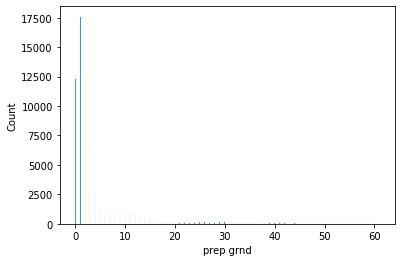

In [109]:
sns.histplot(data=bow_train[bow_train['class']==0], x='prep grnd')

<AxesSubplot:xlabel='prep grnd', ylabel='Count'>

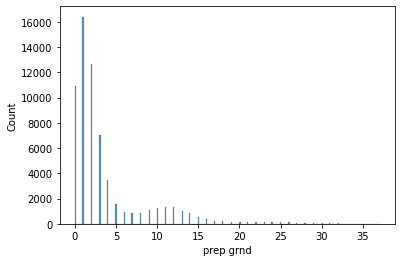

In [107]:
sns.histplot(data=bow_train[bow_train['class']==1], x='prep grnd')

In [150]:
# sns.displot(data=bow_train, x='prep grnd', hue="class", col = "class")

In [43]:
max(bow_train.loc[bow_train['class'] == 0]['prep grnd'])

61

In [42]:
max(bow_train.loc[bow_train['class'] == 1]['prep grnd'])

37

По этому распределению мы видим что эта биграмма встречается в машинных текстах в меньшем количестве. То есть максимум 37 раз за текст, а для human - 61 раз. Медианы у них не отличаются, но это связано с тем что этих биграмм 1-2 шт в подавляющем большинстве текстов.

In [151]:
bow_train.loc[bow_train['class'] == 0]['prep grnd'].median()

2.0

In [154]:
bow_train.loc[bow_train['class'] == 1]['prep grnd'].median()

2.0

На всякий случай проверила длину текстов, тексты human и machine не сильно отличаются по длине, чтобы была такая разница в количестве этой биграммы.

In [155]:
print(data[data['class'] == 'H']['len_text_text'].median())
print(data[data['class'] == 'M']['len_text_text'].median())

95.0
99.0


Изобразим распределение на другом графике:

<AxesSubplot:xlabel='class', ylabel='prep grnd'>

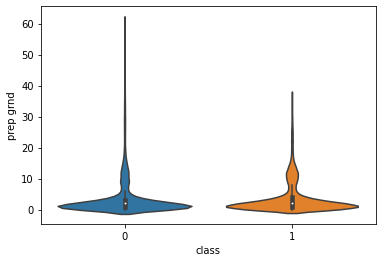

In [59]:
sns.violinplot(x="class", y="prep grnd", data=bow_train)

Вывод: распределение по этой биграмме действительно отличается, возможно можно использовать её для классификации.
Остальные биграммы встречаются очень в маленьком количестве, непонятно, насколько такое получится использовать. Вторая по coef биграмма встречается максимум 4 раза в одном тексте:

<AxesSubplot:xlabel='class', ylabel='verb adjf'>

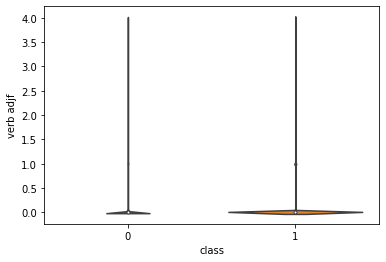

In [156]:
sns.violinplot(x="class", y="verb adjf", data=bow_train)

<AxesSubplot:xlabel='verb adjf', ylabel='Count'>

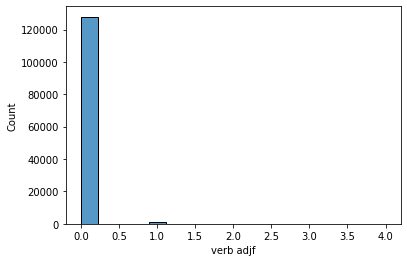

In [157]:
sns.histplot(data=bow_train, x='verb adjf')
# по второй биграмме делаем вывод что практически во всех текстах их 0, и в очень маленьком количестве текстов она от 1 до 4

Но распределение у неё как будто бы очень отличается для human и machine:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 4, figsize=(20,5))

sns.histplot(data=bow_train, bins=10, ax=axes[0]);
sns.histplot(data=bow_train, bins=40, ax=axes[1]);
sns.histplot(data=bow_train, bins=100, ax=axes[2]);
sns.histplot(data=bow_train, bins=100, ax=axes[3]);

In [175]:
verb_adjf1 = bow_train[bow_train["verb adjf"]==1]
verb_adjf1

,noun,adjf,prep,noun noun,noun adjf,adjf prep,prep adjf,adjf noun,none,prcl,...,pred prts,prts intj,intj prts,grnd intj,grnd pred,grnd comp,intj comp,pred numr,numr intj,class
283,11,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
357,11,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,1,0,0,0,1
719,24,4,0,1,0,0,0,0,0,0,...,5,0,0,0,0,8,0,1,1,0
895,28,1,0,0,0,0,0,0,0,0,...,5,0,0,0,0,1,0,0,1,1
956,29,3,0,0,0,1,0,0,0,2,...,7,3,0,2,0,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128123,30,4,0,0,0,0,0,0,0,2,...,5,1,0,0,0,0,0,1,0,1
128340,6,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,2,0,0,0,0
128873,12,2,0,0,0,1,0,0,0,0,...,1,3,0,0,0,4,0,0,1,1
128906,26,1,0,0,0,0,0,2,0,1,...,3,3,0,1,0,5,0,0,1,1


In [171]:
# bow_verb_adjf = pd.DataFrame(
#     {
# #         "class": ['H', 'M'],
#         "1 time": [bow_train[(bow_train['verb adjf'] == 1) & (bow_train['class'] == 0)]['verb adjf'].sum(), bow_train[(bow_train['verb adjf'] == 1) & (bow_train['class'] == 1)]['verb adjf'].sum()],
#         "2 times": [int(bow_train[(bow_train['verb adjf'] == 2) & (bow_train['class'] == 0)]['verb adjf'].sum()/2), int(bow_train[(bow_train['verb adjf'] == 2) & (bow_train['class'] == 1)]['verb adjf'].sum()/2)],
#         "3 times": [int(bow_train[(bow_train['verb adjf'] == 3) & (bow_train['class'] == 0)]['verb adjf'].sum()/3), int(bow_train[(bow_train['verb adjf'] == 3) & (bow_train['class'] == 1)]['verb adjf'].sum()/3)],
#         "4 times": [int(bow_train[(bow_train['verb adjf'] == 4) & (bow_train['class'] == 0)]['verb adjf'].sum()/4), int(bow_train[(bow_train['verb adjf'] == 4) & (bow_train['class'] == 1)]['verb adjf'].sum()/4)],
#     }
# )
# bow_verb_adjf

,1 time,2 times,3 times,4 times
0,188,35,1,1
1,818,104,9,2


In [192]:
(bow_train["class"]==0).count()

129066

<AxesSubplot:xlabel='verb adjf', ylabel='Count'>

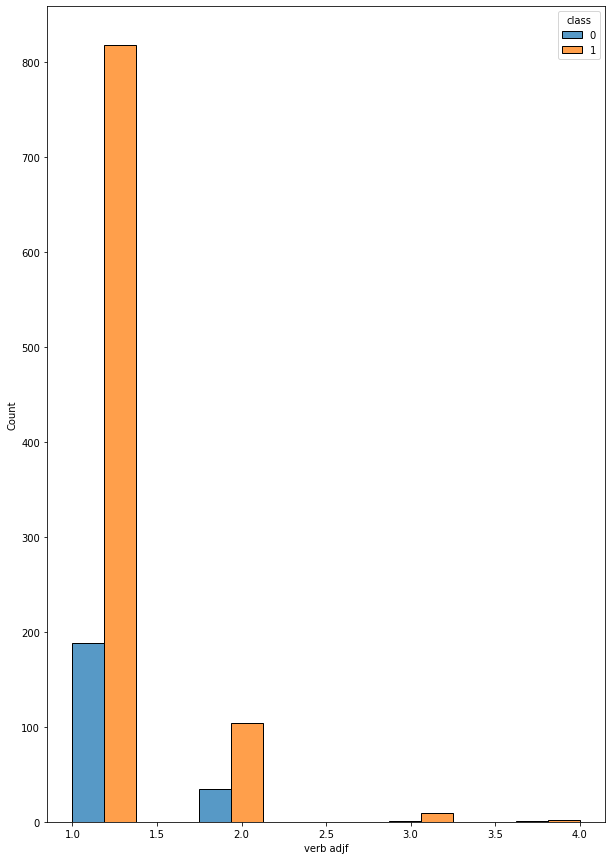

In [188]:
plt.subplots(figsize=(10,15))
sns.histplot(data=bow_train[bow_train["verb adjf"]!=0], x="verb adjf", hue="class", multiple="dodge", shrink=1,\
            bins=8)

In [95]:
a = bow_train[bow_train['verb adjf'] == 1]['verb adjf'].sum()
b = bow_train[(bow_train['verb adjf'] == 1) & (bow_train['class'] == 1)]['verb adjf'].sum()
c = bow_train[(bow_train['verb adjf'] == 1) & (bow_train['class'] == 0)]['verb adjf'].sum()
print(f'Биграмма "verb adjf" встречается 1 раз в {a} текстах')
print(f'Из них в сгенерированных текстах: {b} раз')
print(f'В human текстах: {c} раз')

Биграмма "verb adjf" встречается 1 раз в 1006 текстах
Из них в сгенерированных текстах: 818 раз
В human текстах: 188 раз


In [98]:
a = int(bow_train[bow_train['verb adjf'] == 2]['verb adjf'].sum()/2)
b = int(bow_train[(bow_train['verb adjf'] == 2) & (bow_train['class'] == 1)]['verb adjf'].sum()/2)
c = int(bow_train[(bow_train['verb adjf'] == 2) & (bow_train['class'] == 0)]['verb adjf'].sum()/2)
print(f'Биграмма "verb adjf" встречается 2 раза в {a} текстах')
print(f'Из них в сгенерированных текстах: {b} раз')
print(f'В human текстах: {c} раз')

Биграмма "verb adjf" встречается 2 раза в 139 текстах
Из них в сгенерированных текстах: 104 раз
В human текстах: 35 раз


In [99]:
a = int(bow_train[bow_train['verb adjf'] == 3]['verb adjf'].sum()/3)
b = int(bow_train[(bow_train['verb adjf'] == 3) & (bow_train['class'] == 1)]['verb adjf'].sum()/3)
c = int(bow_train[(bow_train['verb adjf'] == 3) & (bow_train['class'] == 0)]['verb adjf'].sum()/3)
print(f'Биграмма "verb adjf" встречается 3 раза в {a} текстах')
print(f'Из них в сгенерированных текстах: {b} раз')
print(f'В human текстах: {c} раз')

Биграмма "verb adjf" встречается 3 раза в 10 текстах
Из них в сгенерированных текстах: 9 раз
В human текстах: 1 раз


In [100]:
a = int(bow_train[bow_train['verb adjf'] == 4]['verb adjf'].sum()/4)
b = int(bow_train[(bow_train['verb adjf'] == 4) & (bow_train['class'] == 1)]['verb adjf'].sum()/4)
c = int(bow_train[(bow_train['verb adjf'] == 4) & (bow_train['class'] == 0)]['verb adjf'].sum()/4)
print(f'Биграмма "verb adjf" встречается 4 раза в {a} текстах')
print(f'Из них в сгенерированных текстах: {b} раз')
print(f'В human текстах: {c} раз')

Биграмма "verb adjf" встречается 4 раза в 3 текстах
Из них в сгенерированных текстах: 2 раз
В human текстах: 1 раз


Проверим то же самое для 3 фичи:

<AxesSubplot:xlabel='advb infn', ylabel='Count'>

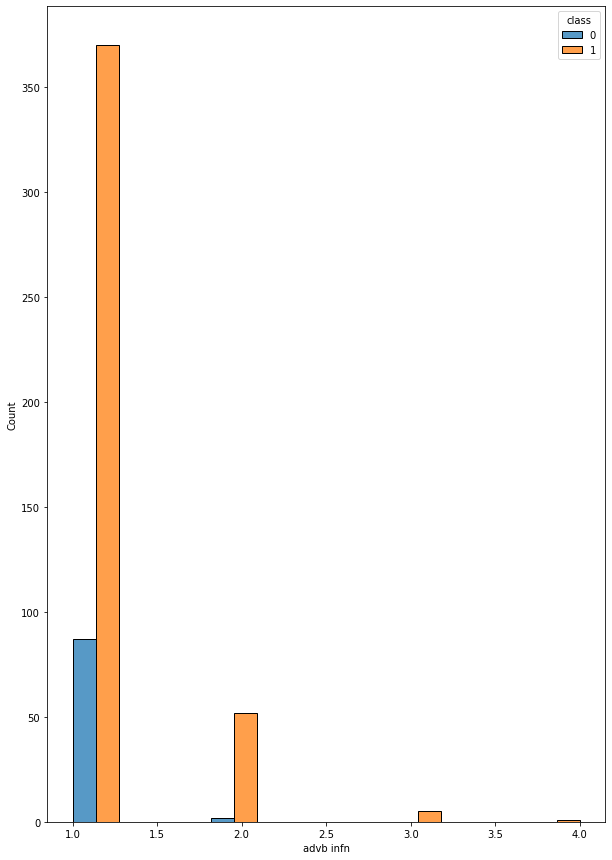

In [190]:
plt.subplots(figsize=(10,15))
sns.histplot(data=bow_train[bow_train["advb infn"]!=0], x="advb infn", hue="class", multiple="dodge", shrink=1)

Тоже работает. Проверим для 4й:

<AxesSubplot:xlabel='intj adjf', ylabel='Count'>

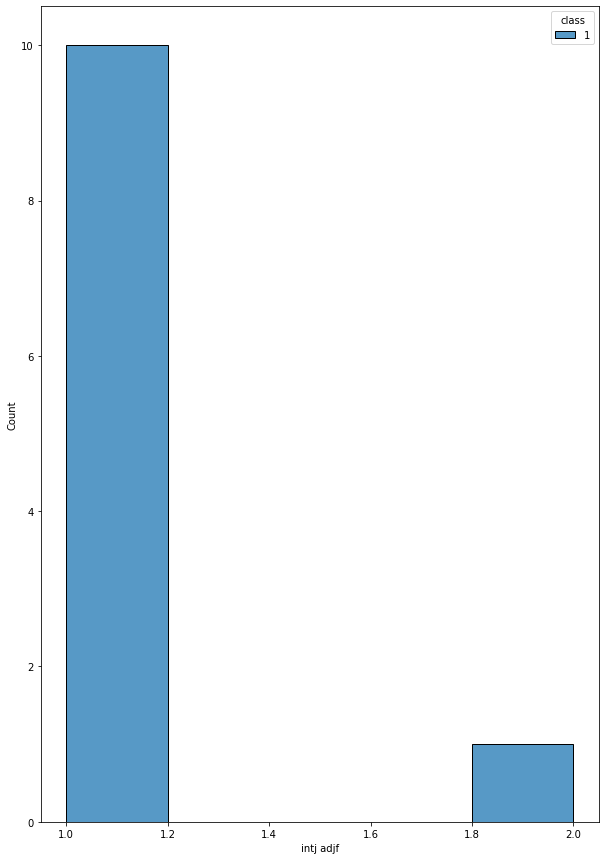

In [194]:
plt.subplots(figsize=(10,15))
sns.histplot(data=bow_train[bow_train["intj adjf"]!=0], x="intj adjf", hue="class", multiple="dodge", shrink=1)

Видимо, 4-я фича встречается только в Human. Проверим:

In [195]:
print(bow_human[bow_human['intj adjf']!=0]['intj adjf'].count())
print(bow_machine[bow_machine['intj adjf']!=0]['intj adjf'].count())

0
11


Штош, получается так, но она всего встречается в 11 текстах, не думаю что это показательно. Проверим 5-ю:

<AxesSubplot:xlabel='adjs advb', ylabel='Count'>

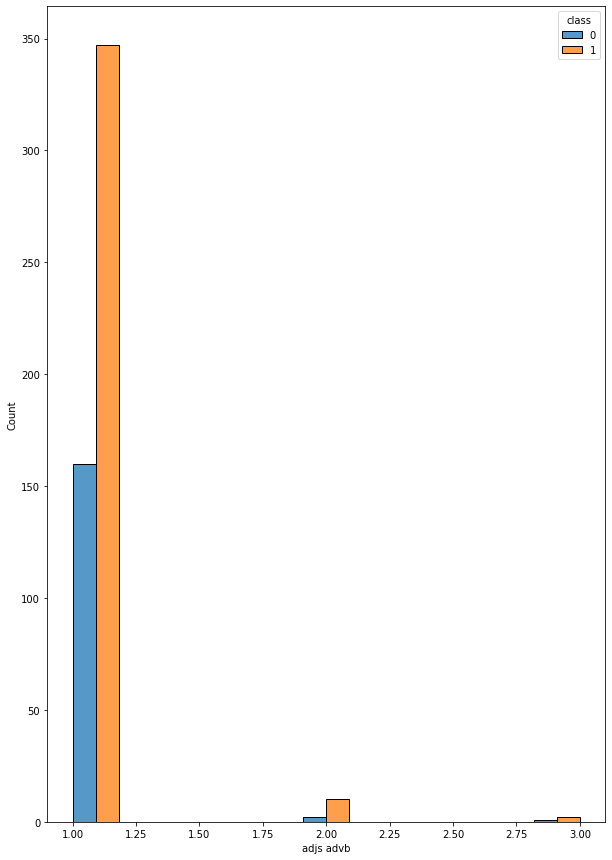

In [196]:
plt.subplots(figsize=(10,15))
sns.histplot(data=bow_train[bow_train["adjs advb"]!=0], x="adjs advb", hue="class", multiple="dodge", shrink=1)

У неё тоже видна разница в human и machine. Она встречается в относительно большом количестве текстов (500+), то есть может быть можно использовать. Проверим количество:

In [198]:
print(bow_human[bow_human['adjs advb']!=0]['adjs advb'].count())
print(bow_machine[bow_machine['adjs advb']!=0]['adjs advb'].count())
print (bow_human[bow_human['adjs advb']!=0]['adjs advb'].count()+bow_machine[bow_machine['adjs advb']!=0]['adjs advb'].count())

163
359
522


Вывод: мне кажется можно использовать 1,2,3 и 5 фичу из списка отранжированных по coef биграмм. У 1-й отличается средняя частота употребления, при этом общее число текстов, в которых она есть, и общее количество биграмм не отличается для Н и М. Остальные проанализированные биграммы имеют большую разницу в частоте употребления в Н и М.
У остальных биграмм coef меньше 1, не стала их анализировать.

Проверим по частотам.

In [256]:
# делаем столбцы с частотами фичей 1,2,3,5
bow_train['prep_grnd_freq'] = bow_train['prep grnd']/bow_train['len_text_text']
bow_train['verb_adjf_freq'] = bow_train['verb adjf']/bow_train['len_text_text']
bow_train['advb_infn_freq'] = bow_train['advb infn']/bow_train['len_text_text']
bow_train['adjs_advb_freq'] = bow_train['adjs advb']/bow_train['len_text_text']

bow_train[bow_train['prep grnd']!=0]

,noun,adjf,prep,noun noun,noun adjf,adjf prep,prep adjf,adjf noun,none,prcl,...,grnd comp,intj comp,pred numr,numr intj,class,len_text_text,prep_grnd_freq,verb_adjf_freq,advb_infn_freq,adjs_advb_freq
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,66,0.015152,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,76,0.026316,0.0,0.0,0.0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,92,0.021739,0.0,0.0,0.0
7,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,47,0.042553,0.0,0.0,0.0
8,16,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,668,0.011976,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129061,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,538,0.022305,0.0,0.0,0.0
129062,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,71,0.028169,0.0,0.0,0.0
129063,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,153,0.019608,0.0,0.0,0.0
129064,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,21,0.047619,0.0,0.0,0.0


Анализируем 1-ю биграмму, prep grnd

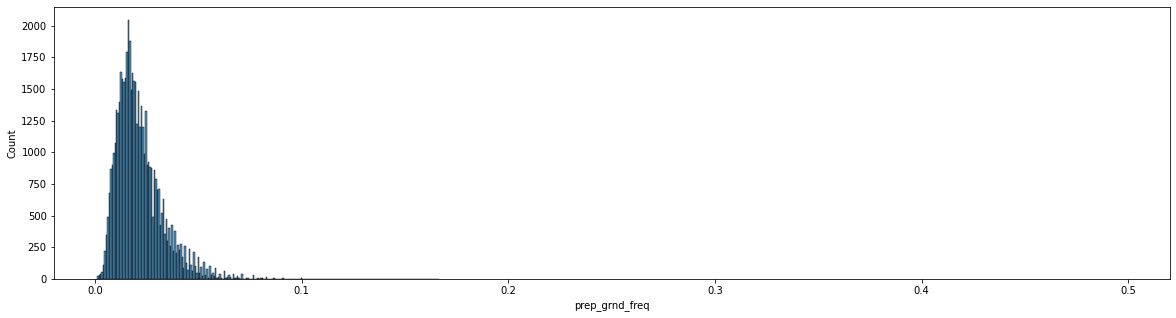

In [243]:
fig, ax = plt.subplots(figsize=(20,5))
try:
    sns.histplot(data=bow_train[(bow_train['prep_grnd_freq'] != 0) & (bow_train['class'] == 0)], x='prep_grnd_freq')
    ax.set_xlim(-0.02,0.52)
    ax.set_xticks(range(0,0.5))
except TypeError:
    pass

<AxesSubplot:xlabel='prep_grnd_freq', ylabel='Count'>

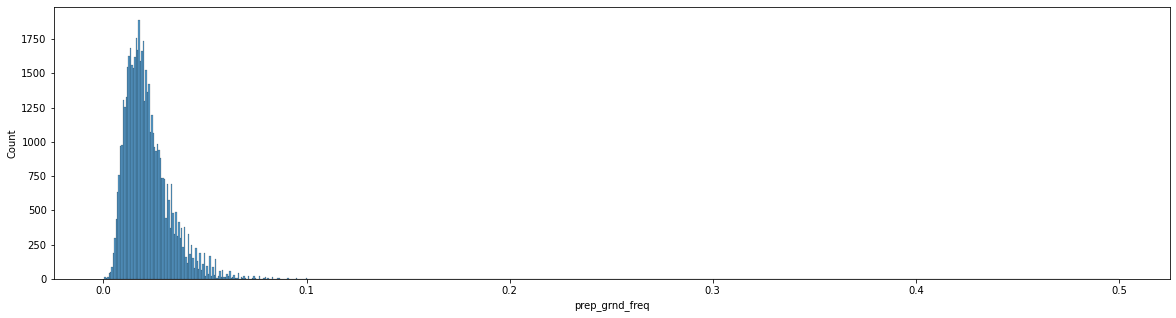

In [241]:
plt.subplots(figsize=(20,5))
sns.histplot(data=bow_train[(bow_train['prep_grnd_freq'] != 0) & (bow_train['class'] == 1)], x='prep_grnd_freq')

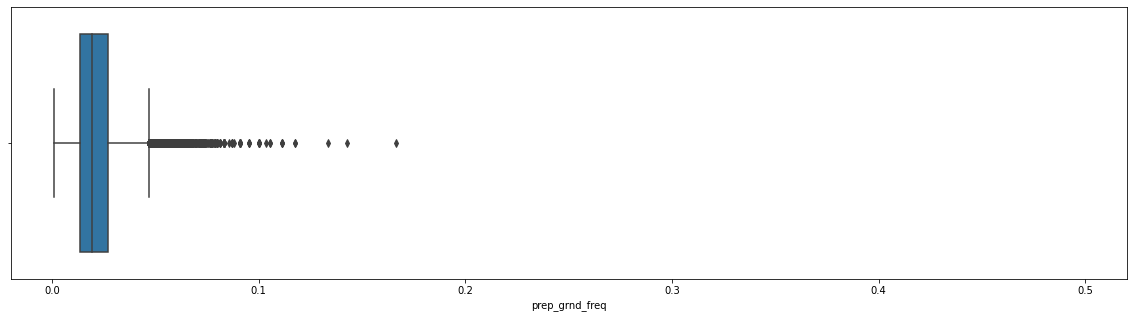

In [239]:
fig, ax = plt.subplots(figsize=(20,5))
try:
    sns.boxplot(data=bow_train[(bow_train['prep_grnd_freq'] != 0) & (bow_train['class'] == 0)], x='prep_grnd_freq')
    ax.set_xlim(-0.02,0.52)
    ax.set_xticks(range(0,0.5))
except TypeError:
    pass

<AxesSubplot:xlabel='prep_grnd_freq'>

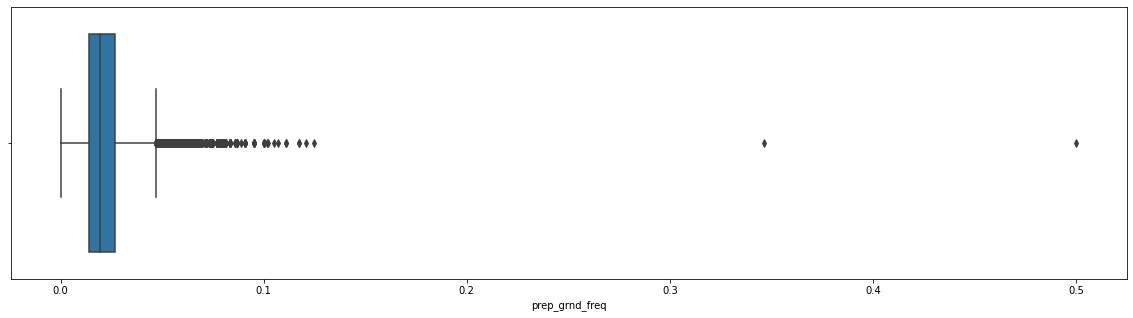

In [216]:
plt.subplots(figsize=(20,5))
sns.boxplot(data=bow_train[(bow_train['prep_grnd_freq'] != 0) & (bow_train['class'] == 1)], x='prep_grnd_freq')

Получается что распределение частот у этой биграммы очень похожее, просто в машинных текстах есть большие выбросы. Похожее респределение показывает фактически одинаковое значение медиан:

In [240]:
print(bow_train[(bow_train['prep_grnd_freq'] != 0) & (bow_train['class'] == 0)]['prep_grnd_freq'].median())
print(bow_train[(bow_train['prep_grnd_freq'] != 0) & (bow_train['class'] == 1)]['prep_grnd_freq'].median())

0.019230769230769232
0.019461077844311378


In [244]:
max(bow_train[bow_train['class'] == 0]['prep_grnd_freq'])

0.16666666666666666

prep_grnd означает "предлог деепричастие"
Пример текстов Н и М, где максимальная частота этой биграммы:

In [279]:
bow_train[bow_train['prep_grnd_freq']==max(bow_train[bow_train['class'] == 0]['prep_grnd_freq'])]

,noun,adjf,prep,noun noun,noun adjf,adjf prep,prep adjf,adjf noun,none,prcl,...,grnd comp,intj comp,pred numr,numr intj,class,len_text_text,prep_grnd_freq,verb_adjf_freq,advb_infn_freq,adjs_advb_freq
86319,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,18,0.166667,0.0,0.0,0.0


In [280]:
print(data['text'][86319])

В.С.В.Д.Ж. сильное


In [283]:
# print(data.loc[86319])

In [245]:
max(bow_train[bow_train['class'] == 1]['prep_grnd_freq'])

0.5

In [284]:
bow_train[bow_train['prep_grnd_freq']==max(bow_train[bow_train['class'] == 1]['prep_grnd_freq'])]

,noun,adjf,prep,noun noun,noun adjf,adjf prep,prep adjf,adjf noun,none,prcl,...,grnd comp,intj comp,pred numr,numr intj,class,len_text_text,prep_grnd_freq,verb_adjf_freq,advb_infn_freq,adjs_advb_freq
58148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,36,0.5,0.0,0.0,0.0


In [285]:
print(data['text'][58148])

У У У У У У У У У У У У У У У У У У.


In [288]:
bow_train[(bow_train['prep_grnd_freq'] >= 0.166)&(bow_train['class'] == 1)]

,noun,adjf,prep,noun noun,noun adjf,adjf prep,prep adjf,adjf noun,none,prcl,...,grnd comp,intj comp,pred numr,numr intj,class,len_text_text,prep_grnd_freq,verb_adjf_freq,advb_infn_freq,adjs_advb_freq
1989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,26,0.346154,0.0,0.0,0.0
58148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,36,0.500000,0.0,0.0,0.0


In [294]:
# посмотрим что в других самых частотных М текстах:
bow_train[(bow_train['prep_grnd_freq'] >= 0.1)&(bow_train['class'] == 1)]\
.sort_values (by='prep_grnd_freq', ascending=False).head(5)

,noun,adjf,prep,noun noun,noun adjf,adjf prep,prep adjf,adjf noun,none,prcl,...,grnd comp,intj comp,pred numr,numr intj,class,len_text_text,prep_grnd_freq,verb_adjf_freq,advb_infn_freq,adjs_advb_freq
58148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,36,0.500000,0.0,0.0,0.0
1989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,26,0.346154,0.0,0.0,0.0
75927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,16,0.125000,0.0,0.0,0.0
88640,0,0,0,0,0,0,0,0,0,0,...,2,0,0,1,1,58,0.120690,0.0,0.0,0.0
7913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,51,0.117647,0.0,0.0,0.0


In [292]:
print(data['text'][58148])
print(data['text'][1989])
print(data['text'][75927])
print(data['text'][88640])
print(data['text'][7913])

У У У У У У У У У У У У У У У У У У.
О, о, о, о, о, о, о, о, о!
Ал-Макдиси (с в.
Он ходил с О.В., ходил к Л., обедал; были разговоры с У.В.
Я agree с ним, и с ним, с ним, с ним, с ним, с ним.


По сути здесь мы сталкиваемся с неправильным присвоением POS-тэгов моделью, потому что ни в одном из этих примеров нет последовательности предлог-деепричастие. Проверим Н тексты:

In [296]:
bow_train[(bow_train['prep_grnd_freq'] >= 0.1)&(bow_train['class'] == 0)]\
.sort_values (by='prep_grnd_freq', ascending=False).head(5)

,noun,adjf,prep,noun noun,noun adjf,adjf prep,prep adjf,adjf noun,none,prcl,...,grnd comp,intj comp,pred numr,numr intj,class,len_text_text,prep_grnd_freq,verb_adjf_freq,advb_infn_freq,adjs_advb_freq
86319,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,18,0.166667,0.0,0.0,0.0
27450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,0.142857,0.0,0.0,0.0
102274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,15,0.133333,0.0,0.0,0.0
43360,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17,0.117647,0.0,0.0,0.0
107117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17,0.117647,0.0,0.0,0.0


In [297]:
print(data['text'][86319])
print(data['text'][27450])
print(data['text'][102274])
print(data['text'][43360])
print(data['text'][107117])

В.С.В.Д.Ж. сильное
С. 18).
До конца XIX в.
У ДОЧЕРИ НА ДАЧЕ.
На хоз-во -100 р.


In [304]:
# В.С.В.Д.Ж. сильное
print(bow_train.loc[86319][bow_train.loc[86319]!=0])

noun               1.000000
conj adjf          1.000000
pred               1.000000
advb adjf          1.000000
advb prcl          1.000000
prep grnd          3.000000
advb intj          1.000000
prcl grnd          2.000000
len_text_text     18.000000
prep_grnd_freq     0.166667
Name: 86319, dtype: float64


Нет такой последовательности. Проверим вторую биграмму, 'verb adjf'.

In [299]:
bow_train[(bow_train['verb_adjf_freq'] > 0)&(bow_train['class'] == 1)]\
.sort_values (by='verb_adjf_freq', ascending=False).head(5)

,noun,adjf,prep,noun noun,noun adjf,adjf prep,prep adjf,adjf noun,none,prcl,...,grnd comp,intj comp,pred numr,numr intj,class,len_text_text,prep_grnd_freq,verb_adjf_freq,advb_infn_freq,adjs_advb_freq
61255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,28,0.0,0.035714,0.0,0.0
18708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,29,0.0,0.034483,0.0,0.0
17785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,34,0.0,0.029412,0.0,0.0
31721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,36,0.0,0.027778,0.0,0.0
79568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,37,0.0,0.027027,0.0,0.0


In [300]:
# здесь должна быть пара глагол-имя прилагательное (полное)
# Machine:
print(data['text'][61255])
print(data['text'][18708])
print(data['text'][17785])
print(data['text'][31721])
print(data['text'][79568])

Что больше — Токио или Кобе?
Он играет лучше piano, чем я.
Кто бегает быстрее, Юми или Кейко?
Я не могу больше toleraть это тепло.
Это лучше 100 друзей, чем 100 рублей.


Штош в 3 из 5 предложений есть такая биграмма. Уже прогресс.

In [301]:
# Human
bow_train[(bow_train['verb_adjf_freq'] > 0)&(bow_train['class'] == 0)]\
.sort_values (by='verb_adjf_freq', ascending=False).head(5)

,noun,adjf,prep,noun noun,noun adjf,adjf prep,prep adjf,adjf noun,none,prcl,...,grnd comp,intj comp,pred numr,numr intj,class,len_text_text,prep_grnd_freq,verb_adjf_freq,advb_infn_freq,adjs_advb_freq
41242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,31,0.000000,0.032258,0.0,0.0
40723,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,34,0.029412,0.029412,0.0,0.0
123250,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,70,0.014286,0.028571,0.0,0.0
21665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,39,0.000000,0.025641,0.0,0.0
50242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,41,0.000000,0.024390,0.0,0.0


In [302]:
# Human
print(data['text'][41242])
print(data['text'][40723])
print(data['text'][123250])
print(data['text'][21665])
print(data['text'][50242])

Хандра! и Т. Вернее — наоборот.
Что дальше -- Мы ехали на трамвае.
Фортуново число для pn# всегда больше pn и все его делители больше pn.
Сегодня занятия шли лучше — 15 страниц.
Когда мы были сильнее — тогда или теперь?


В Human только в 2 из 5 на самом деле есть такая биграмма.

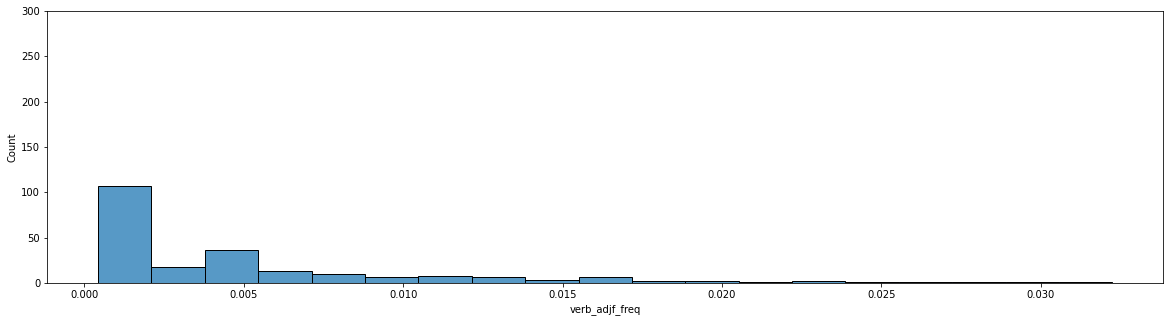

In [276]:
fig, ay = plt.subplots(figsize=(20,5))
try:
    sns.histplot(data=bow_train[(bow_train['verb_adjf_freq'] != 0) & (bow_train['class'] == 0)], x='verb_adjf_freq')
    ay.set_ylim(0,300)
#     ay.set_yticks(range(0,300))
except TypeError:
    pass

<AxesSubplot:xlabel='verb_adjf_freq', ylabel='Count'>

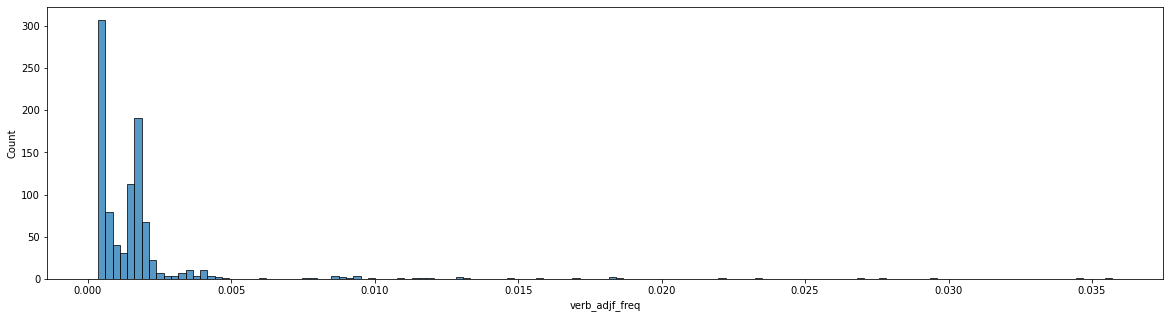

In [260]:
plt.subplots(figsize=(20,5))
sns.histplot(data=bow_train[(bow_train['verb_adjf_freq'] != 0) & (bow_train['class'] == 1)], x='verb_adjf_freq')

In [269]:
a = bow_train[(bow_train['verb_adjf_freq'] > 0)&(bow_train['verb_adjf_freq'] <= 0.005)]['verb_adjf_freq'].count()
b = bow_train[(bow_train['verb_adjf_freq'] > 0)&(bow_train['verb_adjf_freq'] <= 0.005) & (bow_train['class'] == 1)]['verb_adjf_freq'].count()
c = bow_train[(bow_train['verb_adjf_freq'] > 0)&(bow_train['verb_adjf_freq'] <= 0.005) & (bow_train['class'] == 0)]['verb_adjf_freq'].count()
print(f'Биграмма "verb adjf" встречается с частотой от 0 до 0.005 в {a} текстах')
print(f'Из них в сгенерированных текстах: {b} раз')
print(f'В human текстах: {c} раз')

Биграмма "verb adjf" встречается с частотой от 0 до 0.005 в 1059 текстах
Из них в сгенерированных текстах: 900 раз
В human текстах: 159 раз


In [270]:
a = bow_train[(bow_train['verb_adjf_freq'] > 0.005)&(bow_train['verb_adjf_freq'] <= 0.01)]['verb_adjf_freq'].count()
b = bow_train[(bow_train['verb_adjf_freq'] > 0.005)&(bow_train['verb_adjf_freq'] <= 0.01) & (bow_train['class'] == 1)]['verb_adjf_freq'].count()
c = bow_train[(bow_train['verb_adjf_freq'] > 0.005)&(bow_train['verb_adjf_freq'] <= 0.01) & (bow_train['class'] == 0)]['verb_adjf_freq'].count()
print(f'Биграмма "verb adjf" встречается с частотой от 0.005 до 0.01 в {a} текстах')
print(f'Из них в сгенерированных текстах: {b} раз')
print(f'В human текстах: {c} раз')

Биграмма "verb adjf" встречается с частотой от 0.005 до 0.01 в 43 текстах
Из них в сгенерированных текстах: 13 раз
В human текстах: 30 раз


По частоте от 0 до 0.005 есть большие различия в Н и М. На бОльшей частоте уже очень мало текстов и наверное это не показательно.